# Análisis exploratorio de datos

## Unidad 10: Extracción de datos con APIs y Web Scraping

**Índice**   
1. [Application Programming Interfaces (APIs)](#id1)
2. [Métodos de Web Scraping](#id2)


In [ ]:
# Montamos la unidad Drive para acceder a los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Especificamos la ruta hasta la carpeta donde tenemos los archivos de la Unidad 10
%cd /content/drive/MyDrive/Colab_Notebooks/Analisis_exploratorio_datos/Unidad7_8

### 1. Application Programming Interfaces (APIs) <a name="id1"></a>

#### 1.1. Introducción a las APIs

Una API es una interfaz que permite a las aplicaciones o programas comunicarse entre sí. Es una forma estructurada y estándar para que un programa solicite y reciba información o funcionalidad de otro sin necesidad de interactuar directamente con su código interno.

Cuando se usa una API, el flujo de pasos es el siguiente:

1. Un cliente (por ejemplo, una aplicación o un navegador) envía una solicitud a la API:
- La solicitud incluye:
  - Una URL específica (endpoint de la API).
  - Un método HTTP (como `GET`, `POST`, `PUT`, o `DELETE`).
  - Parámetros (opcional, como filtros, búsquedas, etc.).
  - Autenticación (en caso de que la API lo requiera, como una clave API).


2. El servidor recibe y procesa la solicitud:
  1. Valida la autenticación.
  2. Verifica que los parámetros sean correctos.
  3. Realiza la acción requerida (consulta a una base de datos, calcula resultados, etc.).
  4. Devuelve una respuesta en un formato estándar (generalmente **JSON** o **XML**).


3. El cliente recibe la respuesta
- La respuesta puede incluir datos, confirmación de éxito o un error.
- El cliente procesa esta información para mostrarla al usuario o realizar alguna acción adicional.

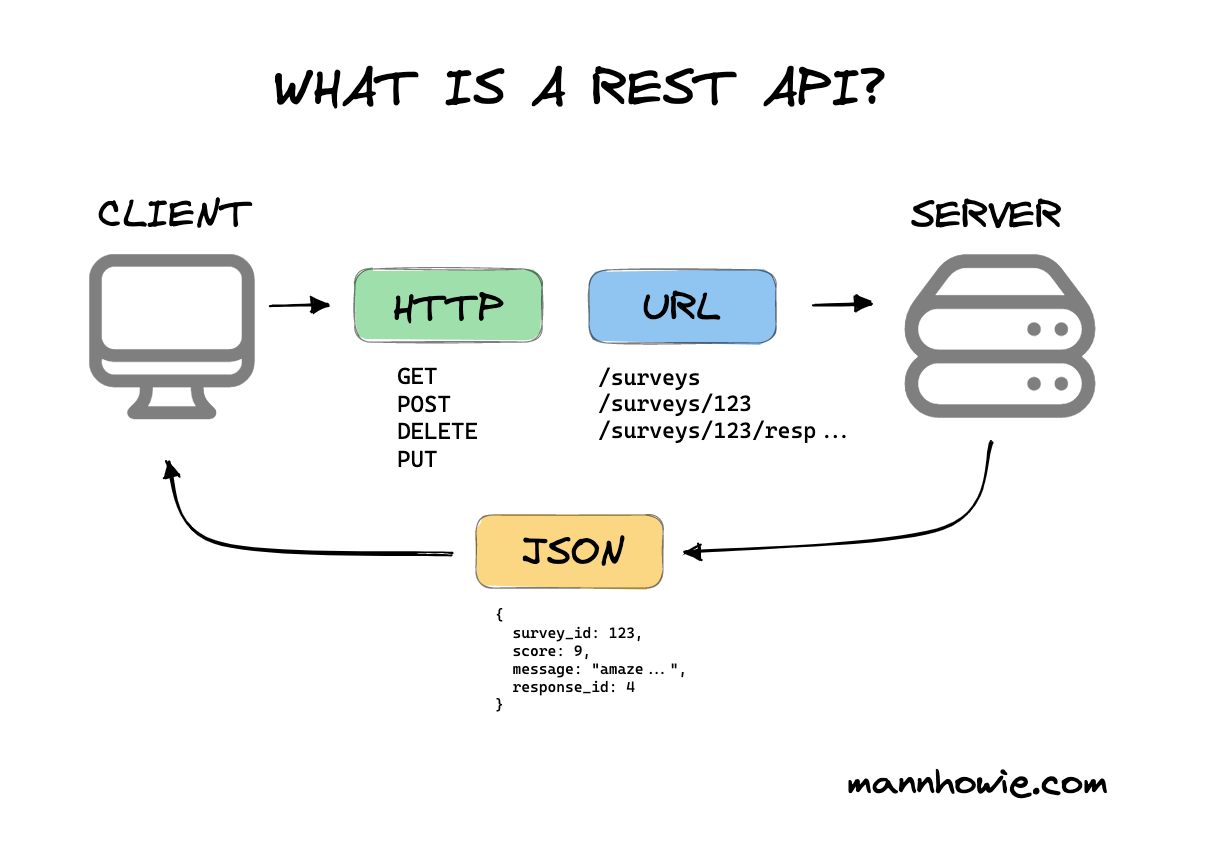

In [ ]:
from IPython import display
display.Image("img/rest-api.png", width=1000)

#### 1.2 Métodos HTTP comunes en una API

Las acciones más comunes que puedes hacer con una API son las siguientes:

| **Método**  | **Función**                                      | **Ejemplo**                                      |
|-------------|--------------------------------------------------|-------------------------------------------------|
| `GET`       | Recuperar datos                                  | Obtener datos de usuarios.                      |
| `POST`      | Enviar datos para crear algo nuevo               | Crear una nueva cuenta de usuario.              |
| `PUT`       | Actualizar datos existentes                      | Cambiar el email de un usuario.                 |
| `DELETE`    | Eliminar datos                                   | Borrar un usuario de la base de datos.          |


#### 1.3 Códigos de estado HTTP

Los códigos de estado HTTP están divididos en cinco categorías, según su número inicial:

| **Categoría** | **Rango**   | **Significado**                                            |
|---------------|-------------|-----------------------------------------------------------|
| **1xx**       | 100-199     | Informativos: La solicitud ha sido recibida y está en proceso. |
| **2xx**       | 200-299     | Éxito: La solicitud se procesó correctamente.             |
| **3xx**       | 300-399     | Redirección: Se requiere una acción adicional del cliente. |
| **4xx**       | 400-499     | Error del cliente: Algo está mal con la solicitud.         |
| **5xx**       | 500-599     | Error del servidor: Algo falló en el lado del servidor.    |


Los códigos que encontramos más frecuentemente son los siguientes:

1. **Códigos 2xx (Éxito):**
   - `200 OK`: La solicitud fue exitosa y el servidor devolvió los datos esperados.
   - `201 Created`: Se creó un nuevo recurso (usualmente con solicitudes `POST`).
   - `204 No Content`: Solicitud exitosa, pero no hay contenido para devolver.

2. **Códigos 3xx (Redirección):**
   - `301 Moved Permanently`: El recurso se movió a una nueva URL.
   - `302 Found`: Redirección temporal.

3. **Códigos 4xx (Error del cliente):**
   - `400 Bad Request`: La solicitud tiene un error de sintaxis o parámetros inválidos.
   - `401 Unauthorized`: Se requiere autenticación.
   - `403 Forbidden`: El cliente no tiene permiso para acceder al recurso.
   - `404 Not Found`: El recurso solicitado no existe.

4. **Códigos 5xx (Error del servidor):**
   - `500 Internal Server Error`: Error general en el servidor.
   - `502 Bad Gateway`: Un servidor intermediario recibió una respuesta inválida.
   - `503 Service Unavailable`: El servidor no está disponible temporalmente.

#### 1.4 Formato de la respuesta

Las APIs devuelven información en un formato estándar, como:

### **JSON** (JavaScript Object Notation):
```json
{
  "user": {
    "id": 123,
    "name": "John Doe",
    "email": "john@example.com"
  }
}
```

### **XML** (Extensible Markup Language):
```xml
<user>
  <id>123</id>
  <name>John Doe</name>
  <email>john@example.com</email>
</user>
```

#### 1.5 Autenticación en APIs

Algunas APIs requieren autenticación para garantizar la seguridad y controlar el acceso. Los métodos comunes son:
- **API Keys**: Una clave única para identificar al cliente.
- **OAuth**: Un protocolo más seguro para permitir acceso a servicios.
- **Tokens**: Cadenas de caracteres que autorizan al cliente durante un tiempo limitado.

#### 1.6 Librería requests


La librería `requests` es una de las más populares en Python para hacer solicitudes HTTP de manera simple y eficiente. Permite interactuar con APIs, descargar contenido de la web o enviar datos a un servidor sin necesidad de manejar los detalles complejos del protocolo HTTP.

El atributo `response.status_code` se usa para verificar el código de estado HTTP devuelto por el servidor después de realizar una solicitud. Este código indica el resultado de la solicitud y ayuda a saber si fue exitosa o si hubo algún problema.

In [ ]:
# Cargamos la librería
import requests

# Especificamos la URL de la API
url = "https://api.adviceslip.com/advice"

# Realizamos la solicitud GET
response = requests.get(url)

# Verificamos si la solicitud fue exitosa
if response.status_code == 200:
  # Convertimos la respuesta en JSON
  data = response.json()
  # Mostramos los datos de la respuesta
  print(f"Formato datos json raw: {data}")
  print(f"Consejo aleatorio: {data['slip']['advice']}")
else:
  print(f"[ERROR] al obtener datos de la API. Código de estado: {response.status_code}")

Formato datos json raw: {'slip': {'id': 25, 'advice': 'Never buy cheap cling film.'}}
Consejo aleatorio: Never buy cheap cling film.


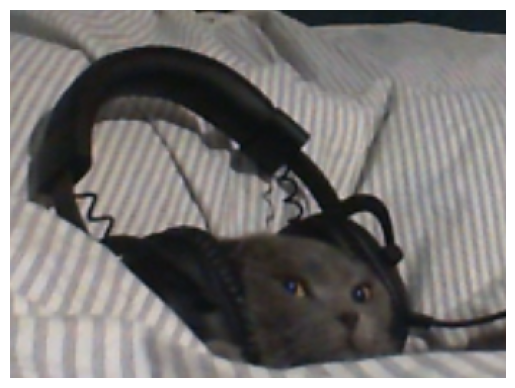

In [ ]:
# Cargamos las librerías necesarias
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Especificamos la URL de la API (gatitos aleatorios)
url = "https://cataas.com/cat"

# Realizamos la solicitud GET
response = requests.get(url)

# Verificamos si la solicitud fue exitosa
if response.status_code == 200:
    # Convertimos el contenido de la respuesta en un objeto de imagen
    img = Image.open(BytesIO(response.content))

    # Mostramos la imagen usando Matplotlib
    plt.imshow(img)
    # Ocultamos los ejes
    plt.axis('off')
    plt.show()
else:
    print(f"[ERROR] al obtener datos de la API. Código de estado: {response.status_code}")

### 2. Métodos de Web Scraping <a name="id2"></a>

#### 2.1 Introdución al Web Scraping

Web Scraping es el proceso de extraer datos directamente de sitios web mediante la descarga y análisis de HTML. Esto se realiza utilizando programas o scripts que navegan, analizan y recopilan datos directamente del código HTML de una página web.

El objetivo es acceder a información que normalmente estaría disponible solo en un navegador, transformándola en un formato estructurado, como tablas, bases de datos o archivos CSV. Esto es útil cuando una API no está disponible o no proporciona la información deseada.


#### 2.2 Pasos del web scraping

El proceso típico de scraping incluye los siguientes pasos:

1. El script envía una solicitud al servidor de la página web utilizando métodos como `GET` o `POST`.
   
2. Se descarga la respuesta del servidor contiene el contenido de la página en formato HTML.

3. Se utiliza una librería o herramienta para identificar y extraer la información relevante de las etiquetas HTML (como `<div>`, `<p>`, `<table>`).

4. Los datos extraídos se procesan y se guardan en el formato deseado, como un archivo CSV o una base de datos.


#### 2.3 Librerías de Scraping

En Python, las librerías más usadas para scraping son:
- BeautifulSoup: Para analizar y extraer datos de HTML.
- Selenium: Para interactuar con páginas web dinámicas.
- Scrapy: Framework para proyectos más avanzados.

**BeautifulSoup**

BeautifulSoup se usa para analizar documentos HTML y XML, facilitando la extracción de información específica de páginas web. Esta librería proporciona una interfaz sencilla para buscar y extraer elementos del código HTML usando métodos como `find()`, `find_all()` o `select()`.

El proceso típico para usar BeautifulSoup es el siguiente:

1. Enviar una solicitud HTTP: se usa requests para obtener la página web.

2. Crear un objeto BeautifulSoup: Una vez que se tiene el HTML de la página, se pasa a BeautifulSoup para analizarlo.

3. Buscar y extraer información: se usan los métodos de BeautifulSoup para encontrar los elementos que necesitas (como títulos, enlaces, imágenes, etc.).

4. Manipulación de datos: se pueden manipular o limpiar los datos obtenidos según sea necesario.

In [ ]:
import requests
from bs4 import BeautifulSoup

# Realizamos una solicitud GET
url = "https://example.com"
response = requests.get(url)

# Analizamos el HTML de la página
# El contenido HTML de la respuesta se pasa a BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')
print("Extraemos toda la información HTML de la página:\n",soup)

# Extraemos el título de la página
title = soup.title.string
print("Título de la página:", title)

Extraemos toda la información HTML de la página:
 <!DOCTYPE html>

<html>
<head>
<title>Example Domain</title>
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>
</head>
<body>
<div>
<h1>Example Domain</h1>

**Métodos comunes**

`find()`: Encuentra el primer elemento que coincida con los criterios proporcionados (por etiqueta, id, clase, etc.).

In [ ]:
# Encuentra el primer <h1>
header = soup.find('h1')
print(header)

<h1>Example Domain</h1>


`find_all()`: Encuentra todos los elementos que coincidan con los criterios proporcionados.

In [ ]:
# Encuentra todos los <p>
paragraphs = soup.find_all('p')
print(paragraphs)

[<p>This domain is for use in illustrative examples in documents. You may use this
    domain in literature without prior coordination or asking for permission.</p>, <p><a href="https://www.iana.org/domains/example">More information...</a></p>]


`select()`: Encuentra elementos usando selectores CSS.

In [ ]:
# Encuentra todos los <a>
links = soup.select('a')
print(links)

[<a href="https://www.iana.org/domains/example">More information...</a>]


`text`: Obtiene el texto de un elemento (eliminando las etiquetas HTML).

In [ ]:
# Extrae solo el texto dentro de un <h1>
text = header.text
print(text)

Example Domain


`attrs`: Accede a los atributos de un elemento (como href en un enlace <a>).

In [ ]:
# Encuentra el primer <a>
link = soup.find('a')
# Obtiene el valor de href
print(link.attrs['href'])

https://www.iana.org/domains/example


**Consideraciones éticas y legales**

- Antes de hacer scraping en un sitio web, revisa su archivo `robots.txt` para asegurarte de que está permitido (por ejemplo: https://en.wikipedia.org/robots.txt).
- No envíes demasiadas solicitudes en un corto período de tiempo.

#### Ejemplo con `http://books.toscrape.com`

Vamos a analizar la información de la web: http://books.toscrape.com y extraer las categorías de la barra lateral.

In [ ]:
# Cargamos las librerías necesarias
import requests
from bs4 import BeautifulSoup

# Especificamos la URL de la página
url = "http://books.toscrape.com"

# Realizamos la solicitud GET
response = requests.get(url)

# Analizamos el HTML de la página
soup = BeautifulSoup(response.text, 'html.parser')
# Damos formato al HTML
formatted_html = soup.prettify()
# Mostramos el HTML formateado
print("Extraemos toda la información HTML de la página:\n",formatted_html)

Extraemos toda la información HTML de la página:
 <!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:29" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="stati

In [ ]:
# Ejemplo 1: Obtener el título de la página
title = soup.title.string
print("Título de la página:", title)

Título de la página: 
    All products | Books to Scrape - Sandbox



In [ ]:
# Encontramos el contenedor de las categorías (es un <ul> dentro de <aside>)
category_section = soup.find('aside', class_='sidebar')
print(category_section)

<aside class="sidebar col-sm-4 col-md-3">
<div id="promotions_left">
</div>
<div class="side_categories">
<ul class="nav nav-list">
<li>
<a href="catalogue/category/books_1/index.html">
                            
                                Books
                            
                        </a>
<ul>
<li>
<a href="catalogue/category/books/travel_2/index.html">
                            
                                Travel
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/mystery_3/index.html">
                            
                                Mystery
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/historical-fiction_4/index.html">
                            
                                Historical Fiction
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/sequential-art_5/index.html">
          

In [ ]:
# Encontramos la lista de categorías
categories = category_section.find('ul')
print(categories)

<ul class="nav nav-list">
<li>
<a href="catalogue/category/books_1/index.html">
                            
                                Books
                            
                        </a>
<ul>
<li>
<a href="catalogue/category/books/travel_2/index.html">
                            
                                Travel
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/mystery_3/index.html">
                            
                                Mystery
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/historical-fiction_4/index.html">
                            
                                Historical Fiction
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/sequential-art_5/index.html">
                            
                                Sequential Art
                            
           

In [ ]:
# Extraemos todos los enlaces <a> dentro de la lista
category_links = categories.find_all('a')
print(category_links)

[<a href="catalogue/category/books_1/index.html">
                            
                                Books
                            
                        </a>, <a href="catalogue/category/books/travel_2/index.html">
                            
                                Travel
                            
                        </a>, <a href="catalogue/category/books/mystery_3/index.html">
                            
                                Mystery
                            
                        </a>, <a href="catalogue/category/books/historical-fiction_4/index.html">
                            
                                Historical Fiction
                            
                        </a>, <a href="catalogue/category/books/sequential-art_5/index.html">
                            
                                Sequential Art
                            
                        </a>, <a href="catalogue/category/books/classics_6/index

In [ ]:
# Mostramos los nombres de las categorías
print("Categorías de libros:")
for link in category_links:
  # Imprimimos el nombre de la categoría sin espacios adicionales
  print(link.text.strip())

Categorías de libros:
Books
Travel
Mystery
Historical Fiction
Sequential Art
Classics
Philosophy
Romance
Womens Fiction
Fiction
Childrens
Religion
Nonfiction
Music
Default
Science Fiction
Sports and Games
Add a comment
Fantasy
New Adult
Young Adult
Science
Poetry
Paranormal
Art
Psychology
Autobiography
Parenting
Adult Fiction
Humor
Horror
History
Food and Drink
Christian Fiction
Business
Biography
Thriller
Contemporary
Spirituality
Academic
Self Help
Historical
Christian
Suspense
Short Stories
Novels
Health
Politics
Cultural
Erotica
Crime


#### **Extra: Estructura HTML**

La estructura básica de HTML es un conjunto de elementos que permite crear la base de una página web.

```
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Mi página web</title>
</head>
<body>
    <header>
        <h1>Bienvenidos a mi página web</h1>
        <nav>
            <ul>
                <li><a href="#home">Inicio</a></li>
                <li><a href="#about">Sobre mí</a></li>
            </ul>
        </nav>
    </header>
    
    <section id="home">
        <h2>Inicio</h2>
        <p>Bienvenido a mi página web.</p>
    </section>

    <footer>
        <p>&copy; 2024 Mi Nombre - Todos los derechos reservados.</p>
    </footer>
</body>
</html>

```

Mounted at /content/drive
/content/drive/MyDrive/Colab_Notebooks/Analisis_exploratorio_datos/Unidad7_8


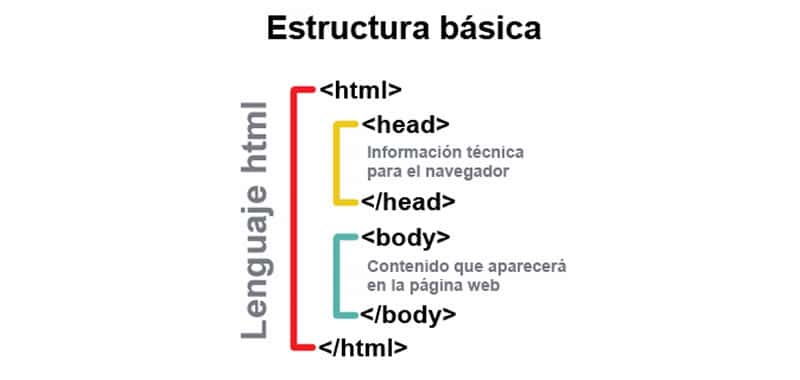

In [ ]:
display.Image("img/estructura_html.jpg")


#### **Componentes clave**:

- **`<!DOCTYPE html>`**: Define el tipo de documento como HTML5.
- **`<html>`**: El elemento raíz que engloba todo el contenido del documento.
- **`<head>`**: Contiene información sobre el documento (metadatos, enlaces a CSS, título de la página).
- **`<meta>`**: Define los metadatos (como la codificación de caracteres y la vista en dispositivos móviles).
- **`<title>`**: El título de la página que aparece en la pestaña del navegador.
- **`<body>`**: Contiene el contenido visible de la página web.
- **`<header>`**: Encabezado de la página, normalmente contiene el título y la navegación.
- **`<nav>`**: Sección para enlaces de navegación.
- **`<ul>`**, **`<li>`**: Lista desordenada (con elementos `<li>`) usada para menús u otras listas.
- **`<section>`**: Sección del contenido que agrupa partes relacionadas de la página.
- **`<footer>`**: Pie de página con información adicional, como derechos de autor.


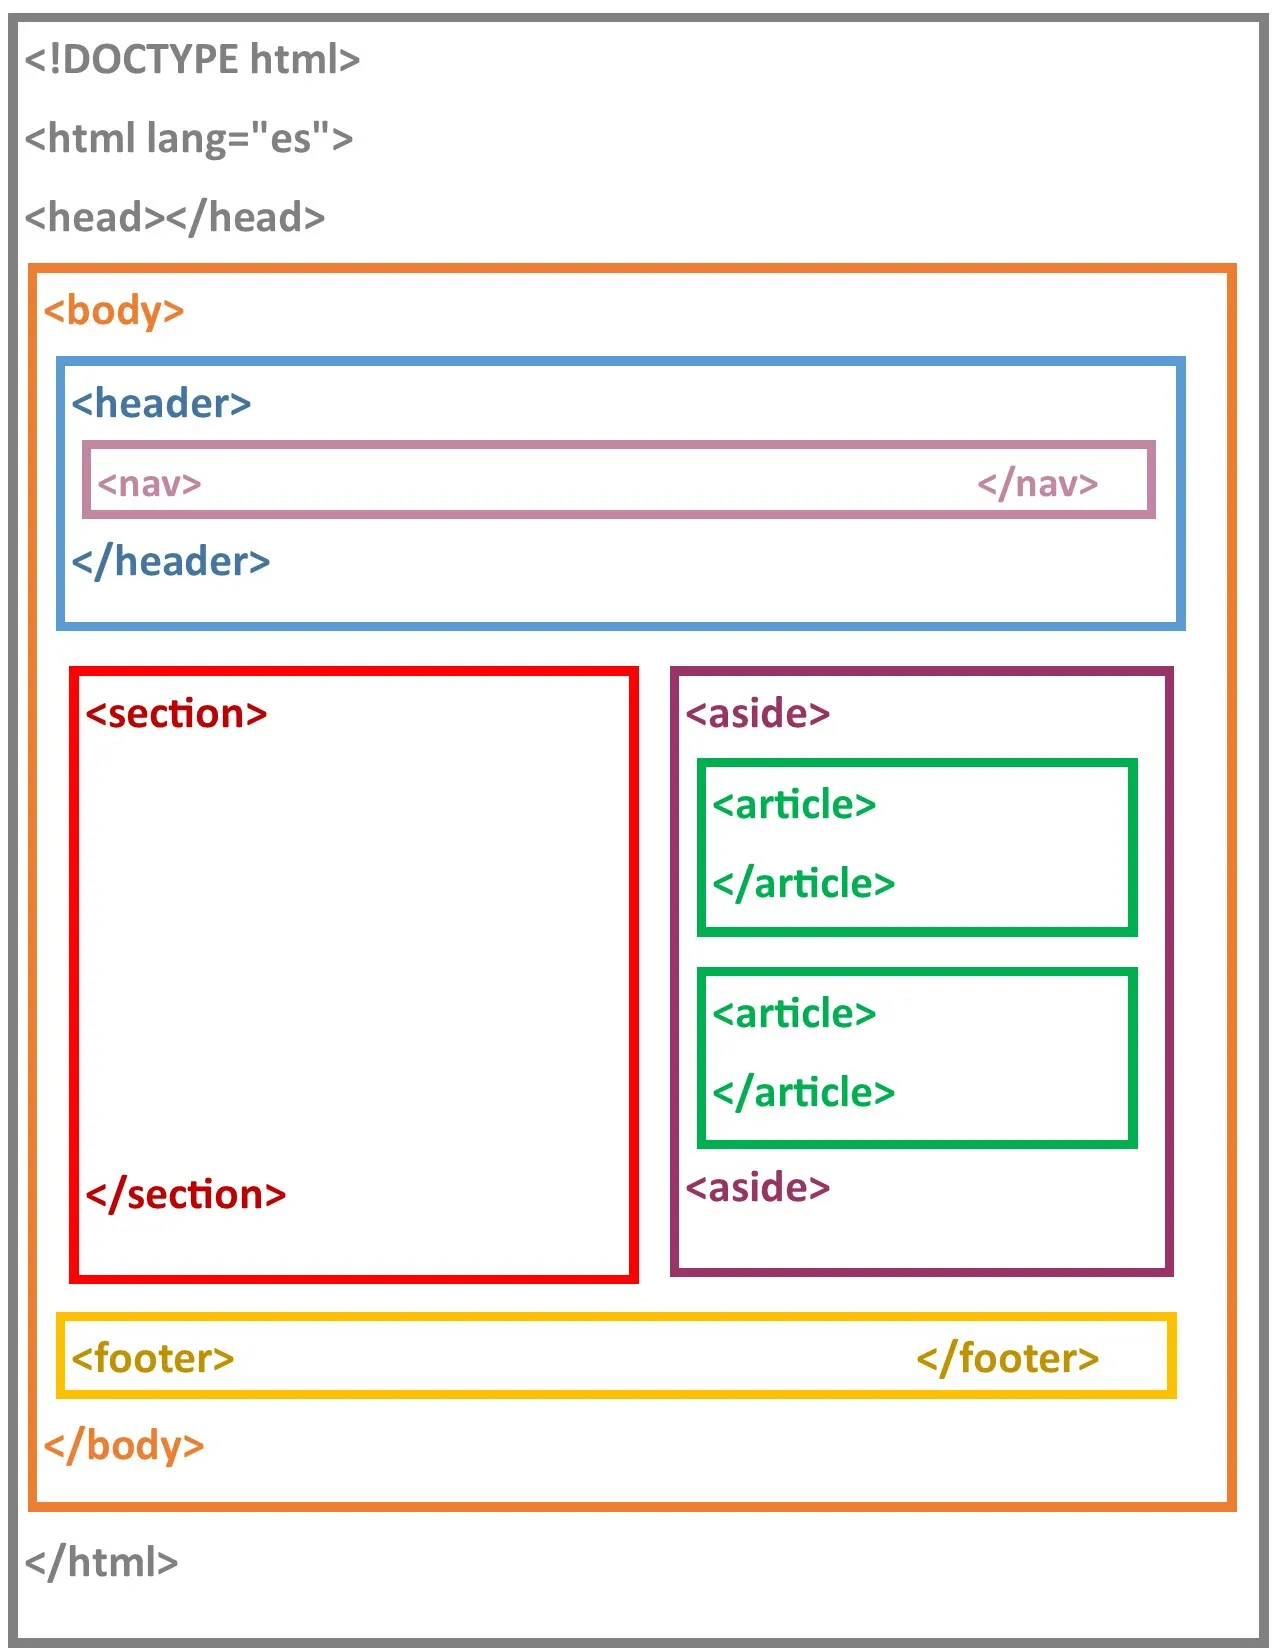

In [ ]:
display.Image("img/estructura_html2.jpg", width=500)